## Taylor Series examples

Created by: Dimitris Giovanis, 23/3/2019


The first-order reliability methods (FORM), as stated by its name, utilizes a first-order Taylor series expansions for the performance function in a standard normal probability space to derive probability of failure estimates. Consider a model in standard normal space  with performance function $g(\textbf{U})$. The FORM approximates
the performance function by:

$g(\textbf{U})  \approx L(\textbf{U}) = g(\textbf{u}^\star) + \nabla g(\textbf{u}^\star)(\textbf{U}-\textbf{u}^\star)^T$


where $\textbf{u}^\star$ is the point around which the series is expanded and its typically called the design point (needs to be found) and it corresponds to the point on the line  $g(\textbf{U})=0$ with the highest probability. $\nabla g(\textbf{u}^\star)$ is the gradient of $g(\textbf{U})$ evaluated at $\textbf{u}^\star$.

The benchmark problem is a simple structural reliability problem
defined in a two-dimensional parameter space consisting of a resistance $R$ and a stress $S$. The failure happens
when the stress is higher than the resistance, leading to the following limit-state function:

$ \textbf{X}=\{R, S\}$

$g(\textbf{X}) = R - S$

The two random variables are independent  and  distributed
according to:

$R \sim N(200, 20)$

$S \sim N(150, 10)$

In [1]:
#from platform import python_version
#print(python_version())

import numpy as np
from UQpy.RunModel import RunModel
import matplotlib.pyplot as plt
from UQpy.RunModel import RunModel
from UQpy.Distributions import Normal
from UQpy.SampleMethods import MCS

In [2]:
# Monte Carlo simulation
dist1 = Normal(loc=200, scale=20)
dist2 = Normal(loc=150, scale=10)

N = 50000
x = MCS(dist_object=[dist1,dist2], nsamples=N, verbose=True)
RunModelObject = RunModel(model_script='pfn.py',model_object_name="example1")
RunModelObject.run(x.samples)
y = np.array(RunModelObject.qoi_list)
idx = sum(i <= 0.0 for i in y)
pf_mcs = idx/N
print(pf_mcs)

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.
0.01314


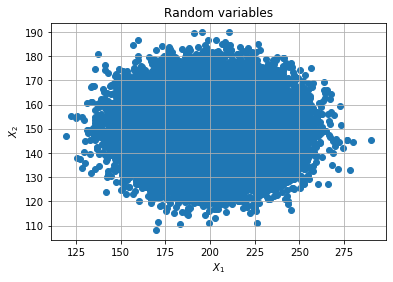

In [3]:
# Plot the initial samples
plt.figure()
plt.title('Random variables')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [5]:
#corr = np.array([[1.0, 0.0], [0.0, 1.0]])
RunModelObject = RunModel(model_script='pfn.py',model_object_name="example1") 
from UQpy.Reliability import FORM
Q = FORM(dist_object=[dist1,dist2], model=RunModelObject)

UQpy: Running First Order Reliability Method...
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.


In [5]:
# print results
print('Design point in standard normal space: %s' % Q.DesignPoint_U)
print('Design point in original space: %s' % Q.DesignPoint_X)
print('Hasofer-Lind reliability index: %s' % Q.HL_beta)
print('FORM probability of failure: %s' % Q.Prob_FORM)
print('FORM function: %s' % Q.g_record)
print('FORM gradient: %s' % Q.dg_record)
print('FORM x points: %s' % Q.x_record)
print('FORM u points: %s' % Q.u_record)
print('FORM alpha points: %s' % Q.alpha_record)

Design point in standard normal space: [[-2.  1.]]
Design point in original space: [[160. 160.]]
Hasofer-Lind reliability index: [2.23606798]
FORM probability of failure: [0.01267366]
FORM function: [50.0, 1.1368683772161603e-11]
FORM gradient: [array([ 20., -10.]), array([ 20., -10.])]
FORM x points: [array([[200., 150.]]), array([[160., 160.]])]
FORM u points: [array([[0., 0.]]), array([[-2.,  1.]])]
FORM alpha points: [array([-0.89442719,  0.4472136 ]), array([-0.89442719,  0.4472136 ])]


/Users/dimitris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


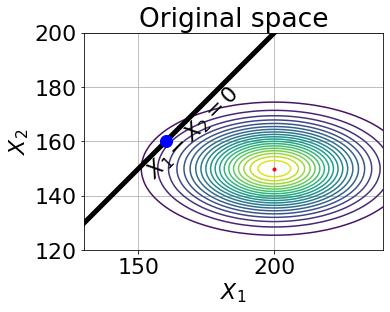

/Users/dimitris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


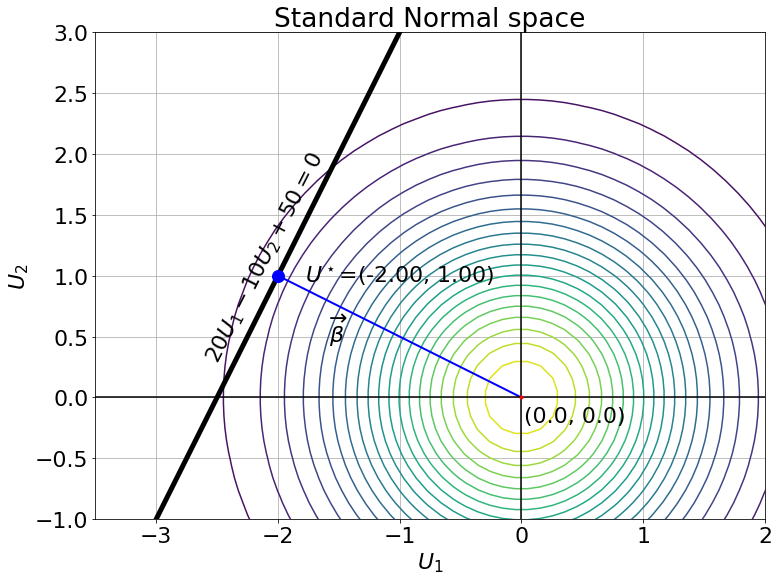

In [6]:
# Supporting function
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

N = 60
XX = np.linspace(150, 250, N)
YX = np.linspace(120, 180, N)
XX, YX = np.meshgrid(XX, YX)

XU = np.linspace(-3, 3, N)
YU = np.linspace(-3, 3, N)
XU, YU = np.meshgrid(XU, YU)

# Mean vector and covariance matrix in the original space
parameters = [[200, 20], [150, 10]]
mu_X = np.array([parameters[0][0], parameters[1][0]])
Sigma_X = np.array([[ parameters[0][1]**2 , 0.0], [0.0,  parameters[1][1]**2]])

# Mean vector and covariance matrix in the ostandard normal space
mu_U = np.array([0., 0.])
Sigma_U = np.array([[ 1. , 0.0], [0.0,  1]])

# Pack X and Y into a single 3-dimensional array for the original space
posX = np.empty(XX.shape + (2,))
posX[:, :, 0] = XX
posX[:, :, 1] = YX
ZX = multivariate_gaussian(posX, mu_X, Sigma_X)

# Pack X and Y into a single 3-dimensional array for the standard normal space
posU = np.empty(XU.shape + (2,))
posU[:, :, 0] = XU
posU[:, :, 1] = YU
ZU = multivariate_gaussian(posU, mu_U, Sigma_U)


# Figure 4a
plt.figure()
plt.rcParams["figure.figsize"] = (12, 12)
plt.rcParams.update({'font.size': 22})
plt.plot(parameters[0][0],parameters[1][0],'r.') 
plt.plot([0, 200],[0, 200], 'k', Linewidth=5)
plt.plot(Q.DesignPoint_X[0][0], Q.DesignPoint_X[0][1],'bo',markersize=12)
plt.contour(XX, YX, ZX, levels=20)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.text(170, 182, '$X_1 - X_2=0$',
         rotation=45,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')
plt.ylim([120, 200])
plt.xlim([130, 240])
plt.grid()
plt.title('Original space')    
plt.axes().set_aspect('equal', 'box')
plt.show()

# Figure 4b
plt.figure()
plt.rcParams["figure.figsize"] = (12, 12)
plt.rcParams.update({'font.size': 22})      
plt.plot([0, Q.DesignPoint_U[0][0]],[0, Q.DesignPoint_U[0][1]], 'b', Linewidth=2)   
plt.plot([0, -3],[5, -1], 'k', Linewidth=5)
plt.plot(Q.DesignPoint_U[0][0], Q.DesignPoint_U[0][1],'bo',markersize=12)
plt.contour(XU, YU, ZU, levels=20)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(0,0,'r.')

plt.xlabel(r'$U_1$')
plt.ylabel(r'$U_2$')
plt.text(-1.0, 1.1, '$U^\star$=({:1.2f}, {:1.2f})'.format(-2.0, 1.0),
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(-2.1, 2.05, '$20U_1 - 10U_2 + 50=0$',
         rotation=63,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(-1.5, 0.7, r'$\overrightarrow{\beta}$',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(0.02, -0.2, '({:1.1f}, {:1.1f})'.format(0.0, 0.0))
plt.ylim([-1, 3])
plt.xlim([-3.5, 2])
plt.grid()
plt.title('Standard Normal space')    
plt.axes().set_aspect('equal', 'box')
plt.show()

## Example #2

In the second example we have the limit state to be a linear function of two ($d$=2) independent Gaussian random variables

$g(\textbf{U}) = -\frac{1}{\sqrt{d}}\sum_{i=1}^{d} u_i + \beta$


The probability of failure in this case is $P(F) ≈ 10^{−3}$ for $\beta$ = 3.0902

In [7]:
dist1 = Normal(loc=0., scale=1.)
dist2 = Normal(loc=0., scale=1.)
RunModelObject2 = RunModel(model_script='pfn.py',model_object_name="example2")
Z = FORM(dist_object=[dist1,dist2], model=RunModelObject2)

UQpy: Running First Order Reliability Method...
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.


In [8]:
# print results
print('Design point in standard normal space: %s' % Z.DesignPoint_U)
print('Design point in original space: %s' % Z.DesignPoint_X)
print('Hasofer-Lind reliability index: %s' % Z.HL_beta)
print('FORM probability of failure: %s' % Z.Prob_FORM)
print('FORM function: %s' % Z.g_record)
print('FORM gradient: %s' % Z.dg_record)
print('FORM x points: %s' % Z.x_record)
print('FORM u points: %s' % Z.u_record)
print('FORM alpha points: %s' % Z.alpha_record)

Design point in standard normal space: [[2.18510138 2.18510138]]
Design point in original space: [[2.18510138 2.18510138]]
Hasofer-Lind reliability index: [3.0902]
FORM probability of failure: [0.00100011]
FORM function: [3.0902, -8.610889778992714e-13]
FORM gradient: [array([-0.70710678, -0.70710678]), array([-0.70710678, -0.70710678])]
FORM x points: [array([[0., 0.]]), array([[2.18510138, 2.18510138]])]
FORM u points: [array([[0., 0.]]), array([[2.18510138, 2.18510138]])]
FORM alpha points: [array([0.70710678, 0.70710678]), array([0.70710678, 0.70710678])]


/Users/dimitris/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


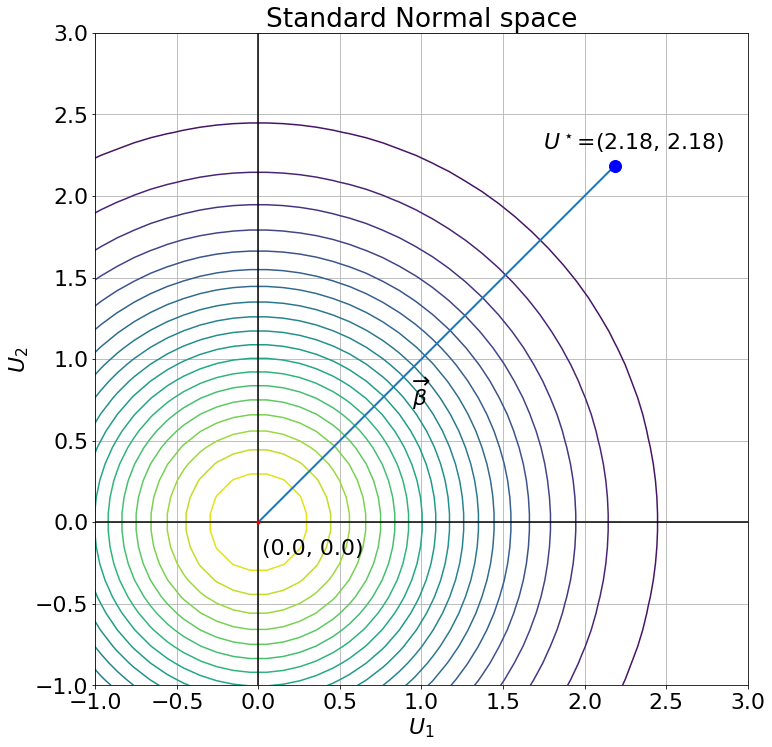

In [9]:
# Figure 4b
plt.figure()
plt.rcParams["figure.figsize"] = (12, 12)
plt.rcParams.update({'font.size': 22}) 
plt.plot([0, Z.DesignPoint_U[0][0]],[0, Z.DesignPoint_U[0][1]], Linewidth=2)                
plt.plot(Z.DesignPoint_U[0][0], Z.DesignPoint_U[0][1],'bo',markersize=12)
plt.contour(XU, YU, ZU, levels=20)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(0,0,'r.')

plt.xlabel(r'$U_1$')
plt.ylabel(r'$U_2$')
plt.text(2.3, 2.4, '$U^\star$=({:1.2f}, {:1.2f})'.format(2.18, 2.18),
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(1.0, 0.9, r'$\overrightarrow{\beta}$',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(0.02, -0.2, '({:1.1f}, {:1.1f})'.format(0.0, 0.0))
plt.ylim([-1, 3])
plt.xlim([-1, 3])
plt.grid()
plt.title('Standard Normal space')    
plt.axes().set_aspect('equal', 'box')
plt.show()

## Example 3

In the third example we have the limit state to be a linear function of three ($d$=3) independent Gaussian random variables

$g(X_1, X_2, X_3) = 6.2X_1 -X_2X_3^2$

$\mu_{X_1}=20, \mu_{X_2}=5, \mu_{X_3}=4$

$\sigma_{X_1}=3.5, \sigma_{X_2}=0.8, \sigma_{X_3}=0.4$

The probability of failure in this case is $P_f ≈ 0.079$ for $\beta$ = 1.413

In [8]:
dist1 = Normal(loc=20., scale=3.5)
dist2 = Normal(loc=5., scale=0.8)
dist3 = Normal(loc=4., scale=0.4)
RunModelObject3 = RunModel(model_script='pfn.py',model_object_name="example3") 
Z0 = FORM(dist_object=[dist1,dist2, dist3], model=RunModelObject3)

UQpy: Running First Order Reliability Method...
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy

In [11]:
# print results
print('Design point in standard normal space: %s' % Z0.DesignPoint_U)
print('Design point in original space: %s' % Z0.DesignPoint_X)
print('Hasofer-Lind reliability index: %s' % Z0.HL_beta)
print('FORM probability of failure: %s' % Z0.Prob_FORM)

Design point in standard normal space: [[-0.94091096  0.65063034  0.82912316]]
Design point in original space: [[16.70681164  5.52050428  4.33164926]]
Hasofer-Lind reliability index: [1.41282639]
FORM probability of failure: [0.07885339]


## Example 4

In the fourth example we have the limit state to be a nonlinear function of two ($d$=2) random variables

$g(X_1, X_2) = X_1X_1 - 80$

where $X_1$ follows a normal distribution with mean $\mu_{X_1}=20$ and standard deviation $\sigma_{X_1}=7$ and $X_2$ follows a lognormal distribution with mean $\mu_{X_2}=7$ and standard deviation $\sigma_{X_2}=1.4$.

In [9]:
from UQpy.Distributions import Lognormal
# Parameter 1
m0 = 7
v0 = 1.4
mu = np.log(m0) - np.log(np.sqrt(1 + (v0 / m0) ** 2))
scale = np.exp(mu)
s = np.sqrt(np.log(1 + (v0 / m0) ** 2))
loc_ = 0.0

dist1 = Normal(loc=20., scale=3.5)
dist2 = Lognormal(s=s, loc=0.0, scale=scale)

RunModelObject4 = RunModel(model_script='pfn.py',model_object_name="example4") 
Q0 = FORM(dist_object=[dist1,dist2], seed=np.array([20, 7]), model=RunModelObject4)

UQpy: Running First Order Reliability Method...
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 8.864090014398182e-18]
UQpy: ITAM Done.
UQpy: Computing Nataf correlation distortion...


/Users/dimitris/PythonProjects/UQpy/src/UQpy/Utilities.py:304: RuntimeWarning: divide by zero encountered in true_divide
  max_ratio = np.amax(np.ones((len(corr), len(corr))) / abs(corr_norm0))


UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correl

In [13]:
# print results
print('Design point in standard normal space: %s' % Q0.DesignPoint_U)
print('Design point in original space: %s' % Q0.DesignPoint_X)
print('Hasofer-Lind reliability index: %s' % Q0.HL_beta)
print('FORM probability of failure: %s' % Q0.Prob_FORM)

Design point in standard normal space: [[-1.46367913 -1.23255488]]
Design point in original space: [[14.87712303  5.37738347]]
Hasofer-Lind reliability index: [1.9135172]
FORM probability of failure: [0.02784094]


In [ ]:
from UQpy.Reliability import SORM
RunModelObject4 = RunModel(model_script='pfn.py',model_object_name="example4") 
Q2 = SORM(dist_object=[dist1,dist2], seed=np.array([20, 7]), model=RunModelObject4)

UQpy: Running First Order Reliability Method...
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 8.248376876761264e-18]
UQpy: ITAM Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
U

In [ ]:
print('SORM probability of failure: %s' % Q2.Prob_SORM)
print('FORM probability of failure: %s' % Q2.Prob_FORM)